## Diabetic Detection

### Logisitc Regression

The Pima Indians Diabetes Dataset involves predicting the onset of diabetes within 5 years in Pima Indians given medical details. This dataset is a small dataset which includes 8 key features & a binary target value as follows:

- Number of times pregnant
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic blood pressure (mm Hg)
- Triceps skin fold thickness (mm)
- 2-Hour serum insulin (mu U/ml)
- Body mass index (weight in kg/(height in m)^2)
- Diabetes pedigree function
- Age (years)
- Class variable (0 or 1) 

A small logistic regression model will be developed in an attempt to predict whether a patient is likely (represented by 1) or not likely (represented by 0) to develop diabetes in the next 5 years.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Before implementing a model to preict the likelihood of diabetes it is first useful to visualise some basic details about the dataset.

In [4]:
data = pd.read_csv('pima_diabetes_clean.csv')
array = data.values
X_Orginal = array[:,0:8]
Y_Orginal = array[:,8]
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


After an initial view of the data we can see that all features contain numeric data, however, the scale of each feature is inconsistent and we may need to apply some feature scaling to enure that out learning model can handle this data correctly. 

Before applying feature scaling it is often worth building a correlation matrix to see which features are highly correlated with the targe value. Viewing the correlation matrix shows that all feature columns have a positive correlation with the target value but columns 1 (Plasma glucose concentration a 2 hours in an oral glucose tolerance test) and 5 (Body mass index (weight in kg/(height in m)^2)) appear to have the highest correlation. 

With this in mind, we will initially build our logistic regression model using these two features only and see what results we can obtain. 

In [5]:
correlations = data.corr()
correlations['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In addition to viewing the correlation matrix it can also be useful to view a scatter plot of the features that we have chosen to form the basis of the model.

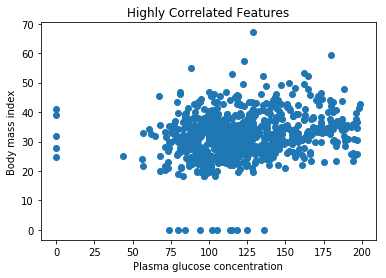

In [6]:
def visualise(data):
    fig, ax = plt.subplots()
    ax.scatter(data.iloc[:,1].values, data.iloc[:,5].values)
    ax.set_title('Highly Correlated Features')
    ax.set_xlabel('Plasma glucose concentration')
    ax.set_ylabel('Body mass index')

visualise(data)

After viewing the scatter plot above it is immediately obvious that we have some missing values in this dataset. With some domain knowledge we can deduce that it should not be possible to have a body mass index or plasma glucose concentration of 0 and we will need to remove this dirty data before building our learning model. This can be achieved quickly by replacing the missing values with `NaN` and then removing these rows from the dataset.

In [7]:
data[['Glucose','BMI']] = data[['Glucose','BMI']].replace(0, np.NaN)
data.dropna(inplace=True)

Once the data has been cleaned up our scatter plot looks much more uniform.

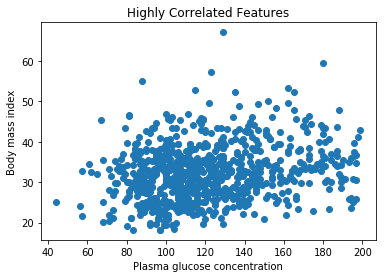

In [8]:
visualise(data)

Since we have decided to use features 1 and 5 to build our logistic regression classifier we can extract the feature columns and target values easily as follows:

In [9]:
X = data[['Glucose','BMI']].values
y = data[['Outcome']].values

In addition, now that we have our feature colums isolated we can apply feature scaling. This can be achieved using the `StandardScaler` class of the `sklearn.preprocessing` package as follows:

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

After feature scaling has been applied our dataset is now a two dimensional `numpy` array where our feature columns are transformed such that their distribution will have a mean value 0 and standard deviation of 1.

In [11]:
mean = np.mean(X, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(X, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))

Mean: (0, 0)
Standard deviation: (1, 1)


The first ten rows of our dataset now look like this:

In [12]:
print(X[0:10,:])

[[ 0.85211873  0.16540919]
 [-1.2079944  -0.84552075]
 [ 1.99662603 -1.322102  ]
 [-1.07719357 -0.62889291]
 [ 0.49241644  1.53738552]
 [-0.19428794 -0.98993931]
 [-1.43689586 -0.21007908]
 [-0.22698815  0.41092074]
 [ 2.45442895 -0.28228836]
 [-0.39048919  0.74308343]]


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[92 12]
 [18 29]]


In [16]:
def precision_recall(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)    
    tp = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    prec = tp / (tp+fp)
    rec = tp / (tp+fn)    
    return prec, rec

precision, recall = precision_recall(y_test, y_pred)
print('Precision: %f Recall %f' % (precision, recall))

Precision: 0.884615 Recall 0.836364


In [17]:
# Accurecy
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X_Orginal, Y_Orginal, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.770 (0.048)


In [18]:
# Aera Under AUC

scoring = 'roc_auc'
results = model_selection.cross_val_score(model, X_Orginal, Y_Orginal, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.824 (0.041)


In [19]:
# Classification Report

from sklearn.metrics import classification_report

model.fit(X_train, y_train)
predicted = model.predict(X_test)
report = classification_report(y_test, predicted)
print(report)

             precision    recall  f1-score   support

          0       0.84      0.88      0.86       104
          1       0.71      0.62      0.66        47

avg / total       0.80      0.80      0.80       151



/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
